<a href="https://colab.research.google.com/github/BDCloud93/homework-BDCloud93/blob/master/ProjektBD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Zaimportowanie zestawu danych dla COVID-19 oraz wszystkich niezbędnych bibliotek

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from matplotlib.legend_handler import HandlerLine2D, HandlerTuple

## Zaimportowanie zestawu danych dla COVID-19
ConfirmedCases_raw=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
Deaths_raw=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
Recoveries_raw=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv ')
another_dataset=pd.read_csv('https://opendata.ecdc.europa.eu/covid19/casedistribution/csv', encoding='latin-1',error_bad_lines=False)


In [0]:
def cleandata(df_raw):
    df_cleaned=df_raw.melt(id_vars=['Province/State','Country/Region','Lat','Long'],value_name='Cases',var_name='Date')
    df_cleaned=df_cleaned.set_index(['Country/Region','Province/State','Date'])
    return df_cleaned 

ConfirmedCases=cleandata(ConfirmedCases_raw)
Deaths=cleandata(Deaths_raw)
Recoveries=cleandata(Recoveries_raw)

Analiza danych dla 30 ostatnich dni z Polski pod względem potwierdzonych przypadków zarażenia, śmierci i wyzdrowienia dla COVID-19

In [0]:
potwierdzone = []
zgony = []
wyleczone = []
ratio = []

potwierdzone = ConfirmedCases.loc["Poland"].tail(30)
zgony = Deaths.loc["Poland"].tail(30)
wyleczone = Recoveries.loc["Poland"].tail(30)

# Utworzenie połączonych zbiorów danych
razem_pz = potwierdzone.merge(zgony, left_on = "Date", right_on = "Date").rename(columns = {"Cases_x": "Potwierdzone","Cases_y": "Zgony"})
razem_z = razem_pz.merge(wyleczone, left_on = "Date", right_on = "Date").rename(columns = {"Cases_x": "Potwierdzone","Cases_y": "Zgony","Cases":"Wyzdrowienia"})
razem_pw = potwierdzone.merge(wyleczone,left_on = "Date", right_on = "Date").rename(columns = {"Cases_x": "Potwierdzone","Cases_y": "Wyzdrowienia"})


Wykres w skali logarytmicznej dla utworzonego zestawu danych 

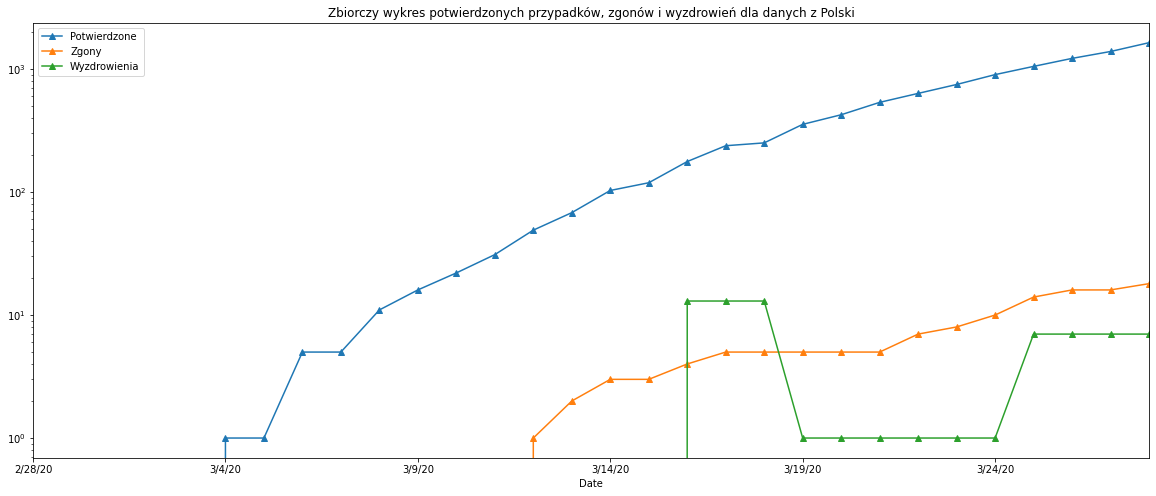

In [0]:
razem_z.plot(y = ['Potwierdzone', 'Zgony','Wyzdrowienia'], figsize = (20,8), marker = '^', title = 'Zbiorczy wykres potwierdzonych przypadków, zgonów i wyzdrowień dla danych z Polski', logy = True)

Analiza porównawcza danych dotyczących zgonów względem potwierdzonych przypadków w ciągu 30 ostatnich dni na terenie Polski

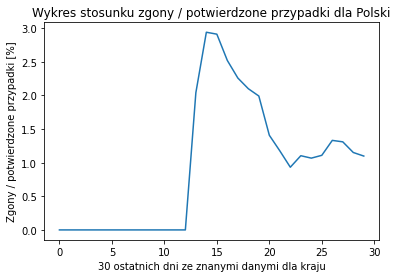

In [0]:

ratio_z = np.nan_to_num(np.array((razem_z['Zgony']) / (razem_z['Potwierdzone'])*100))
wykres1 = (plt.plot(ratio_z),plt.title("Wykres stosunku zgony / potwierdzone przypadki dla Polski"), plt.xlabel("30 ostatnich dni ze znanymi danymi dla kraju"), plt.ylabel("Zgony / potwierdzone przypadki [%]") )


Analiza porównawcza danych dotyczących wyzdrowień względem potwierdzonych przypadków w ciągu 30 ostatnich dni na terenie Polski

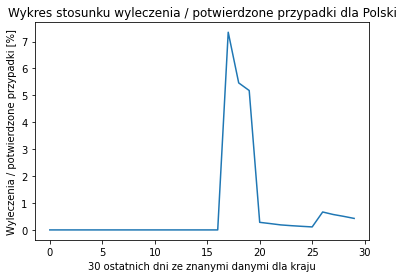

In [0]:
ratio_pw = np.nan_to_num(np.array((razem_pw['Wyzdrowienia']) / (razem_pw['Potwierdzone'])*100))
wykres2 = (plt.plot(ratio_pw),plt.title("Wykres stosunku wyleczenia / potwierdzone przypadki dla Polski"), plt.xlabel("30 ostatnich dni ze znanymi danymi dla kraju"), plt.ylabel("Wyleczenia / potwierdzone przypadki [%]") )


Analiza porównawcza stosunku zgonów względem wyleczeń na terenie polski dla 30 ostatnich dni

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


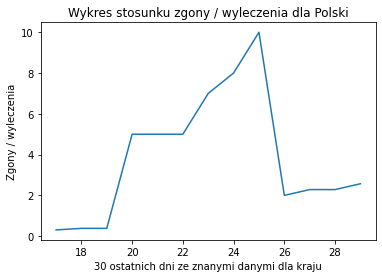

In [0]:
ratio_s = np.array(ratio_z/ratio_pw)
wykres3 = (plt.plot(ratio_s),plt.title("Wykres stosunku zgony / wyleczenia dla Polski"), plt.xlabel("30 ostatnich dni ze znanymi danymi dla kraju"), plt.ylabel("Zgony / wyleczenia"))


Źródła pomocy:

https://www.tutorialspoint.com/numpy/numpy_matplotlib.htm

http://www.przeglepidemiol.pzh.gov.pl/media/niezbednik/Miary%20w%20epidemiologii.pdf

https://matplotlib.org/3.2.1/tutorials/intermediate/legend_guide.html

https://stackoverflow.com/questions/34388800/matplotlib-plotting-pandas-series-attributeerror-tuple-object-has-no-attrib

https://www.geeksforgeeks.org/numpy-nan_to_num-in-python/

https://stackoverflow.com/questions/5552555/unicodedecodeerror-invalid-continuation-byte

https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series

https://opendata.ecdc.europa.eu/covid19/casedistribution/csv